In [ ]:
# gym
!pip install "gym>=0.21.0"
!pip install tf-agents[reverb]

# reinforcement learning
!sudo apt-get update
!sudo apt-get install -y xvfb ffmpeg freeglut3-dev
!pip install 'imageio==2.4.0'
!pip install pyvirtualdisplay
#!pip install tf-agents[reverb] #already installed above
!pip install pyglet

In [33]:
# tensorflow
from tf_agents.policies import random_tf_policy

# standard python
import os
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab\ Notebooks/beerql

# ours
import tfdqn
tfdqn.validate_environment()

# uncomment below to test-run the environment
# tfdqn.test_run_environment()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/beerql


In [35]:
num_iterations = 20000 # @param {type:"integer"}

initial_collect_steps = 100  # @param {type:"integer"}
collect_steps_per_iteration =   1# @param {type:"integer"}
replay_buffer_max_length = 100000  # @param {type:"integer"} 

batch_size = 64  # @param {type:"integer"}
learning_rate = 1e-3  # @param {type:"number"}
log_interval = 200  # @param {type:"integer"}

num_eval_episodes = 1  # @param {type:"integer"}
eval_interval = 1000  # @param {type:"integer"}

In [36]:
env, train_py_env, eval_py_env, train_env, eval_env, agent = tfdqn.get_dqn_agent((100, 50), learning_rate)

In [37]:
# compute 5 episodes of random_policy for testing
random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(), train_env.action_spec())
tfdqn.compute_avg_return(eval_env, random_policy, 5)

-4000.2

In [38]:
replay_buffer, rb_observer = tfdqn.get_replay_buffer(agent, replay_buffer_max_length)

In [39]:
cumulative_returns, dqn_policy = tfdqn.train(
  agent, env, train_py_env, train_env, eval_env, 
  replay_buffer, rb_observer, batch_size,
  num_iterations, initial_collect_steps, collect_steps_per_iteration, 
  log_interval, eval_interval, num_eval_episodes    
)

step = 200: loss = 1551.00244140625
step = 400: loss = 1302.9097900390625
step = 600: loss = 4198.19091796875
step = 800: loss = 4077.67431640625
step = 1000: loss = 8434.341796875
step = 1000: Average Return = -4097.0
step = 1200: loss = 6103.38427734375
step = 1400: loss = 7850.82080078125
step = 1600: loss = 10888.2490234375
step = 1800: loss = 6650.48046875
step = 2000: loss = 7092.775390625
step = 2000: Average Return = -3704.0
step = 2200: loss = 7453.45947265625
step = 2400: loss = 8407.6142578125
step = 2600: loss = 17330.74609375
step = 2800: loss = 10736.89453125
step = 3000: loss = 7037.30126953125
step = 3000: Average Return = -3853.0
step = 3200: loss = 13079.583984375
step = 3400: loss = 21083.828125
step = 3600: loss = 19402.28125
step = 3800: loss = 20280.376953125
step = 4000: loss = 19827.955078125
step = 4000: Average Return = -3526.0
step = 4200: loss = 12035.9140625
step = 4400: loss = 11701.3193359375
step = 4600: loss = 22566.1953125
step = 4800: loss = 22006.234

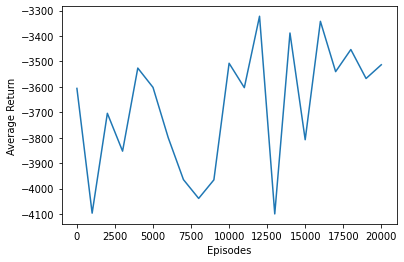

In [40]:
tfdqn.plot_returns(cumulative_returns, num_iterations, eval_interval)

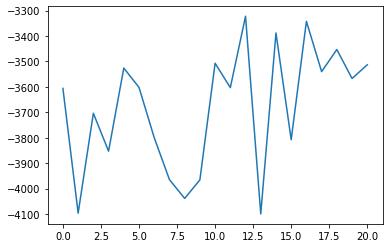

In [41]:
plt.plot(cumulative_returns)

In [ ]:
policy_dict, observations_dict, cumulative_returns = tfdqn.dqn_get_policy(eval_env, agent.policy)

In [43]:
agent_names = ["Retailer", "Distributor",  "Manufacturer", "Supplier"] 
import pandas as pd
dfdqn = pd.DataFrame.from_dict(observations_dict)

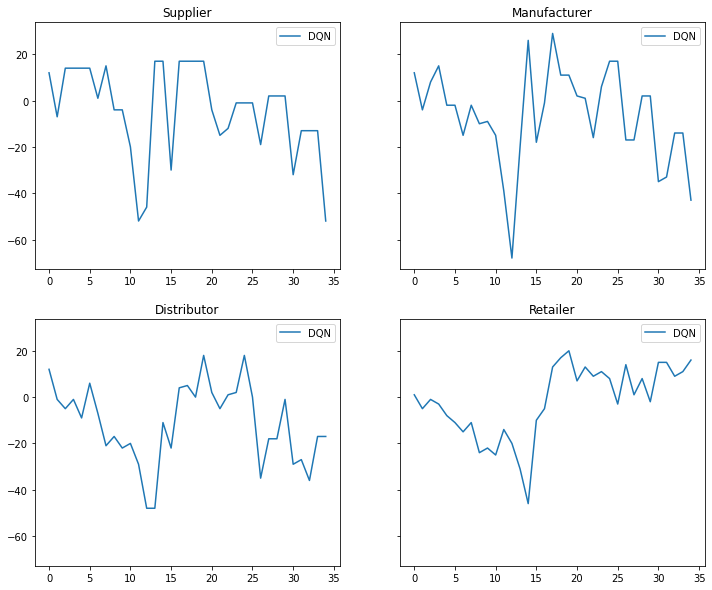

In [44]:
fig, axes = plt.subplots(2,2, sharey=True, figsize=(12,10))

axes[0,0].plot(dfdqn[3], label="DQN")
axes[0,0].set_title("Supplier")
axes[0,0].legend()

axes[0,1].plot(dfdqn[2], label="DQN")
axes[0,1].set_title("Manufacturer")
axes[0,1].legend()

axes[1,0].plot(dfdqn[1], label="DQN")
axes[1,0].set_title("Distributor")
axes[1,0].legend()

axes[1,1].plot(dfdqn[0], label="DQN")
axes[1,1].set_title("Retailer")
axes[1,1].legend()